In [2]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict
from langchain_google_genai import ChatGoogleGenerativeAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [3]:
load_dotenv()

True

In [4]:
llm = ChatGoogleGenerativeAI(model='gemini-2.5-flash')

In [5]:
# define state 
class JokeState(TypedDict):
    topic:str 
    joke:str 
    explanation:str

In [7]:
# functions for nodes 
# 1st function
def generate_joke(state:JokeState):
    prompt = f'Write a joke about the topic- {state['topic']}'
    response = llm.invoke(prompt).content
    
    return {'joke':response}

# 2nd function

def generate_explanation(state:JokeState):
    prompt = f'Wrtte an explanation for the following joke \n {state['joke']}'
    
    response = llm.invoke(prompt).content
    
    return {'explanation':response}

In [9]:
# workflow
graph  = StateGraph(JokeState)

#nodes
graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)


# edges

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)


# checkpointer
checkpointer = InMemorySaver()


workflow = graph.compile(checkpointer=checkpointer)


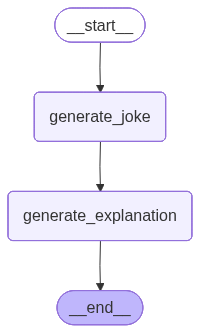

In [10]:
workflow

In [13]:
config1 = {"configurable":{"thread_id":"1"}}

workflow.invoke({'topic':"pizza"}, config = config1)

{'topic': 'pizza',
 'joke': "Why did the pizza maker get fired?\nBecause he couldn't make enough **dough**!",
 'explanation': 'This joke is a classic pun! The humor lies in the double meaning of the word "**dough**":\n\n1.  **Literal Meaning (in the context of a pizza maker):** "Dough" refers to the uncooked mixture of flour, water, and other ingredients that is used to make pizza crust. A pizza maker literally works with and makes dough every day.\n2.  **Slang Meaning:** "Dough" is a common informal term for **money**. If someone "can\'t make enough dough," it means they aren\'t earning enough money or aren\'t generating enough profit for their employer.\n\n**The Explanation:**\n\nThe joke sets you up to think about the literal meaning: "Why would a pizza maker get fired? Maybe they couldn\'t physically make enough pizza dough to keep up with orders."\n\nHowever, the punchline cleverly twists this expectation by using the **slang meaning of "dough" (money)**. The real reason the pizza

In [14]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker get fired?\nBecause he couldn't make enough **dough**!", 'explanation': 'This joke is a classic pun! The humor lies in the double meaning of the word "**dough**":\n\n1.  **Literal Meaning (in the context of a pizza maker):** "Dough" refers to the uncooked mixture of flour, water, and other ingredients that is used to make pizza crust. A pizza maker literally works with and makes dough every day.\n2.  **Slang Meaning:** "Dough" is a common informal term for **money**. If someone "can\'t make enough dough," it means they aren\'t earning enough money or aren\'t generating enough profit for their employer.\n\n**The Explanation:**\n\nThe joke sets you up to think about the literal meaning: "Why would a pizza maker get fired? Maybe they couldn\'t physically make enough pizza dough to keep up with orders."\n\nHowever, the punchline cleverly twists this expectation by using the **slang meaning of "dough" (money)**. The re

In [15]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza maker get fired?\nBecause he couldn't make enough **dough**!", 'explanation': 'This joke is a classic pun! The humor lies in the double meaning of the word "**dough**":\n\n1.  **Literal Meaning (in the context of a pizza maker):** "Dough" refers to the uncooked mixture of flour, water, and other ingredients that is used to make pizza crust. A pizza maker literally works with and makes dough every day.\n2.  **Slang Meaning:** "Dough" is a common informal term for **money**. If someone "can\'t make enough dough," it means they aren\'t earning enough money or aren\'t generating enough profit for their employer.\n\n**The Explanation:**\n\nThe joke sets you up to think about the literal meaning: "Why would a pizza maker get fired? Maybe they couldn\'t physically make enough pizza dough to keep up with orders."\n\nHowever, the punchline cleverly twists this expectation by using the **slang meaning of "dough" (money)**. The r

In [16]:
config2 = {'configurable':{"thread_id":"2"}}
workflow.invoke({'topic':"India"},config=config2)

{'topic': 'India',
 'joke': 'Here\'s one for you:\n\n"My friend tried making Indian food last night. He said it was so spicy, his taste buds called tech support to report a malfunction!"',
 'explanation': 'This joke is funny because it uses **hyperbole**, **personification**, and a relatable experience to create an absurd and imaginative image.\n\nHere\'s a breakdown:\n\n1.  **Relatable Setup:** "My friend tried making Indian food last night."\n    *   Indian cuisine is renowned for its rich flavors and often, its significant level of spice. This sets the expectation for the punchline. Many people have experienced or heard about very spicy Indian food.\n\n2.  **The Exaggeration/Hyperbole:** "He said it was so spicy..."\n    *   This confirms the food was *extremely* spicy, paving the way for the over-the-top reaction.\n\n3.  **The Punchline (Personification & Metaphor):** "...his taste buds called tech support to report a malfunction!"\n    *   **Personification:** Taste buds, which ar

In [17]:
workflow.get_state(config2)

StateSnapshot(values={'topic': 'India', 'joke': 'Here\'s one for you:\n\n"My friend tried making Indian food last night. He said it was so spicy, his taste buds called tech support to report a malfunction!"', 'explanation': 'This joke is funny because it uses **hyperbole**, **personification**, and a relatable experience to create an absurd and imaginative image.\n\nHere\'s a breakdown:\n\n1.  **Relatable Setup:** "My friend tried making Indian food last night."\n    *   Indian cuisine is renowned for its rich flavors and often, its significant level of spice. This sets the expectation for the punchline. Many people have experienced or heard about very spicy Indian food.\n\n2.  **The Exaggeration/Hyperbole:** "He said it was so spicy..."\n    *   This confirms the food was *extremely* spicy, paving the way for the over-the-top reaction.\n\n3.  **The Punchline (Personification & Metaphor):** "...his taste buds called tech support to report a malfunction!"\n    *   **Personification:** T

In [18]:
list(workflow.get_state_history(config2))

[StateSnapshot(values={'topic': 'India', 'joke': 'Here\'s one for you:\n\n"My friend tried making Indian food last night. He said it was so spicy, his taste buds called tech support to report a malfunction!"', 'explanation': 'This joke is funny because it uses **hyperbole**, **personification**, and a relatable experience to create an absurd and imaginative image.\n\nHere\'s a breakdown:\n\n1.  **Relatable Setup:** "My friend tried making Indian food last night."\n    *   Indian cuisine is renowned for its rich flavors and often, its significant level of spice. This sets the expectation for the punchline. Many people have experienced or heard about very spicy Indian food.\n\n2.  **The Exaggeration/Hyperbole:** "He said it was so spicy..."\n    *   This confirms the food was *extremely* spicy, paving the way for the over-the-top reaction.\n\n3.  **The Punchline (Personification & Metaphor):** "...his taste buds called tech support to report a malfunction!"\n    *   **Personification:** 